In [37]:
#importing packages
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
#loading dataset
cf10 = keras.datasets.cifar10
(train_X, train_Y), (test_X, test_Y) = cf10.load_data()

In [39]:
#splitting training data into 2 sets
#training and validation
#stratify maintains class distribution ratio
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.15, stratify=train_Y, random_state=10)

#printing data shape
print(f'Training Data - {train_X.shape}')
print(f'Validation Data - {val_X.shape}')
print(f'Testing Data - {test_X.shape}')

Training Data - (42500, 32, 32, 3)
Validation Data - (7500, 32, 32, 3)
Testing Data - (10000, 32, 32, 3)


In [40]:
#class labels
labels = {0:'Airplane',
         1:'Automobile',
         2:'Bird',
         3:'Cat',
         4:'Deer',
         5:'Dog',
         6:'Frog',
         7:'Horse',
         8:'Ship',
         9:'Truck'}

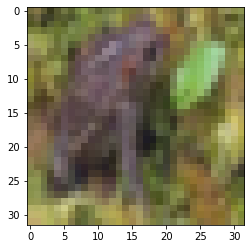

Image Label - Frog


In [41]:
#checking data
plt.figure()
plt.imshow(train_X[0])
plt.show()
print(f'Image Label - {labels[train_Y[0][0]]}')

In [42]:
#creating network
model = keras.Sequential([
    
    layers.Input(shape=[32,32,3]),
    
    layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding='same', strides=2),
    layers.MaxPool2D(pool_size=3, strides=2),
    
    #stage 1
    layers.Conv2D(filters=64, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=64, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=64, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    
    #stage 2
    layers.Conv2D(filters=128, kernel_size=1, activation='relu', padding='same', strides=2),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=128, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=128, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=128, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same'),
    
    #stage 3
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same', strides=2),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=1024, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=1024, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=1024, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=1024, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=1024, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=256, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=1024, kernel_size=1, activation='relu', padding='same'),
    
    #stage 4
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same', strides=2),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=2048, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=2048, kernel_size=1, activation='relu', padding='same'),
    
    layers.Conv2D(filters=512, kernel_size=1, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=2048, kernel_size=1, activation='relu', padding='same'),
    
    #classification layers
    layers.GlobalAveragePooling2D(),
    layers.Dense(units=1024, activation='relu'), 
    layers.Dense(units=10, activation='sigmoid'), #equal to num classes
    layers.Softmax() #to convert vector outputs to class probabilities
])

In [43]:
#compiling model
model.compile(
    optimizer= 'adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #use this loss when labels are integer values
    metrics=['accuracy']
)

#callbacks
#---------

#this stops training if validation accuracy dosent improve by 1% in 15 epochs
early_stopping = keras.callbacks.EarlyStopping(patience=30, min_delta=0.01, restore_best_weights=True)

In [ ]:
#training model
history = model.fit(
    train_X, train_Y,
    validation_data= (val_X, val_Y),
    batch_size=300,
    epochs=200,
    #callbacks =[early_stopping]
)

Train on 42500 samples, validate on 7500 samples
Epoch 1/200
42500/42500 [==============================] - 19s 456us/sample - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/200
42500/42500 [==============================] - 14s 323us/sample - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/200
42500/42500 [==============================] - 14s 324us/sample - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/200
42500/42500 [==============================] - 14s 325us/sample - loss: 2.3026 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/200
42500/42500 [==============================] - 14s 325us/sample - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/200
42500/42500 [==============================] - 14s 326us/sample - loss: 2.3026 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/200
42500/42500 [==============

42500/42500 [==============================] - 14s 322us/sample - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 55/200
42500/42500 [==============================] - 14s 322us/sample - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 56/200
42500/42500 [==============================] - 14s 322us/sample - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 57/200
42500/42500 [==============================] - 14s 324us/sample - loss: 2.3026 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 58/200
42500/42500 [==============================] - 14s 322us/sample - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 59/200
42500/42500 [==============================] - 14s 323us/sample - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 60/200
42500/42500 [==============================] - 14s 322us/sample - loss: 2.3026 - a

In [ ]:
#learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
#predictions
preds = model.predict(test_X)

#checking random prediction
plt.figure()
plt.imshow(test_X[5])
plt.show()
print(f'The label is - {labels[test_Y[5][0]]}')
print(f'Model predicted - {labels[np.argmax(preds[5])]}')

In [ ]:
#model performance
model.evaluate(test_X, test_Y,verbose=2)